In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
tr = pd.read_csv("input/cmc_train.csv")
ts = pd.read_csv("input/cmc_test.csv")
df = pd.concat([tr, ts], axis=0)
df['contraceptive'] = df['contraceptive'].replace(1, 'no-use')
df['contraceptive'] = df['contraceptive'].replace(2, 'long-term')
df['contraceptive'] = df['contraceptive'].replace(3, 'short-term')

In [81]:
target_cols = ['no-use', 'short-term', 'long-term']

In [65]:
df.columns

Index(['wifes_age', 'wifes_edu', 'husbands_edu', 'n_children', 'wifes_rel',
       'wifes_working', 'husbands_occ', 'sol', 'media', 'contraceptive'],
      dtype='object')

- Temos mais instâncias que não usam nenhum método contraceptivo, seguido pelas que usam métodos de curto prazo e por ultimo de longo prazo

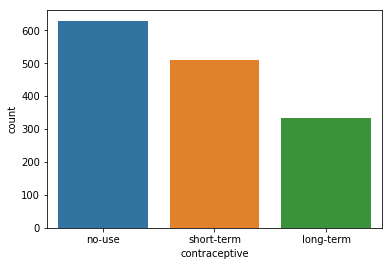

In [82]:
sns.countplot(x='contraceptive', data=df, order=target_cols)

- Temos uma minoria de instâncias que não tem nenhum filho
- Para 1 ou mais filhos temos quase o mesmo número de instâncias para cada caso
- Quem não tem filhos, tende a não fazer uso de nenhum método contraceptivo

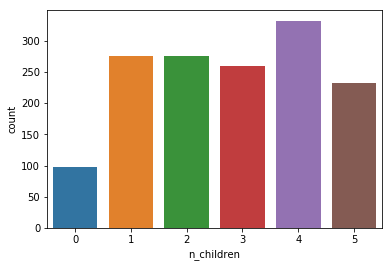

In [84]:
sns.countplot(x='n_children', data=df)

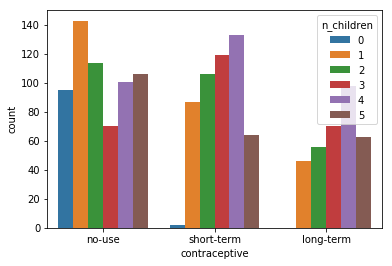

In [86]:
sns.countplot(x='contraceptive', hue='n_children', data=df, order=target_cols)

- Para todos os casos considerando a exposição à mídia a preferencia de métodos é 1, 2, 3

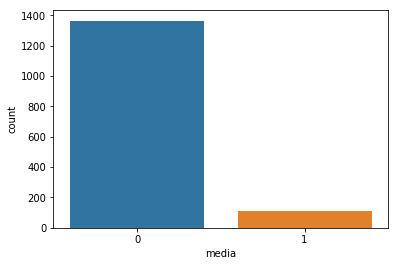

In [69]:
sns.countplot(x='media', data=df)

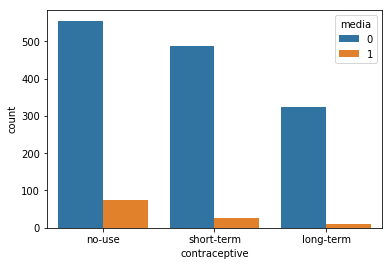

In [85]:
sns.countplot(x='contraceptive', hue='media', data=df, order=target_cols)

- O padrao de vida não define o uso de métodos contraceptivos

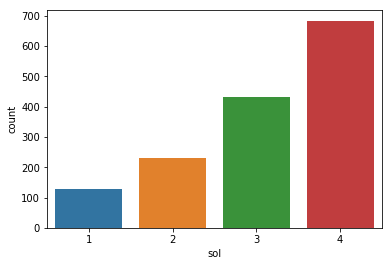

In [71]:
sns.countplot(x='sol', data=df)

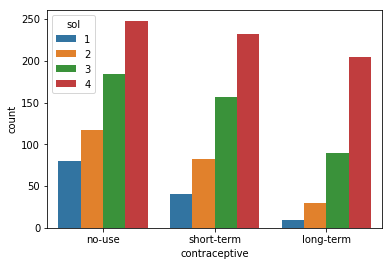

In [87]:
sns.countplot(x='contraceptive', hue='sol', data=df, order=target_cols)

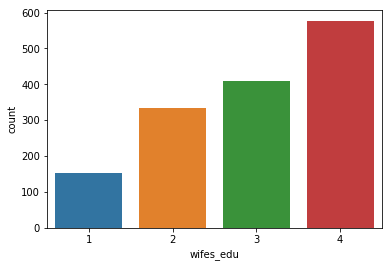

In [74]:
sns.countplot(x='wifes_edu', data=df)

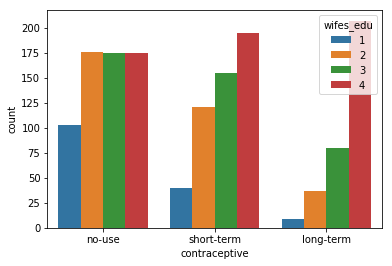

In [88]:
sns.countplot(x='contraceptive', hue='wifes_edu', data=df, order=target_cols)

In [ ]:
sns.countplot(x='wifes_edu', data=df)

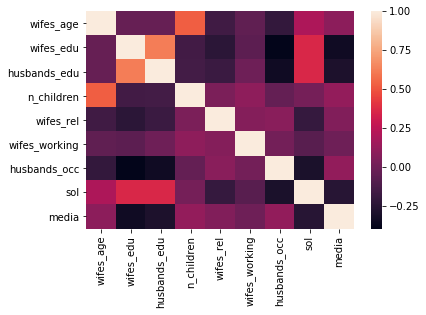

In [89]:
sns.heatmap(df.corr())

In [8]:
from itertools import product

In [17]:
column_pairs = filter(lambda x: x[0] != x[1], product(tr.columns, tr.columns))

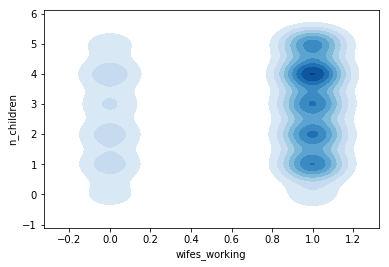

/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/_kernel_base.py:514: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:1534: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:1535: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


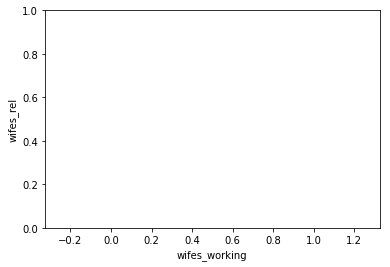

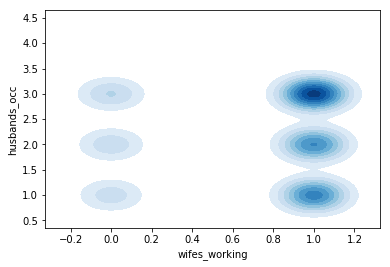

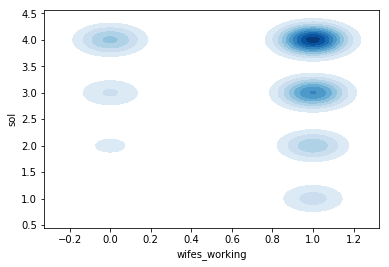

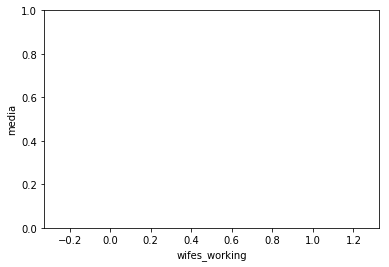

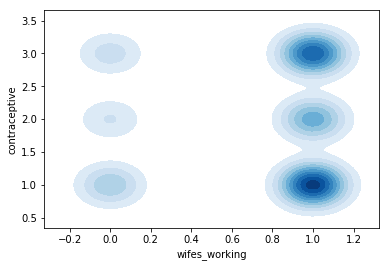

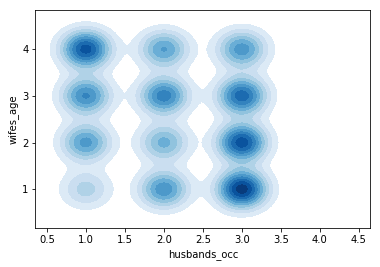

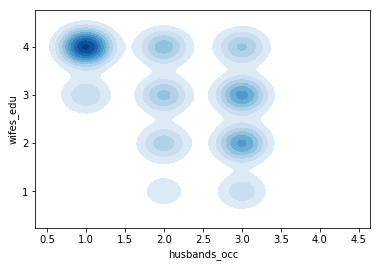

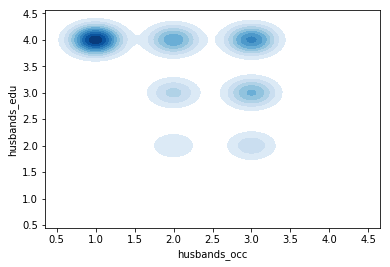

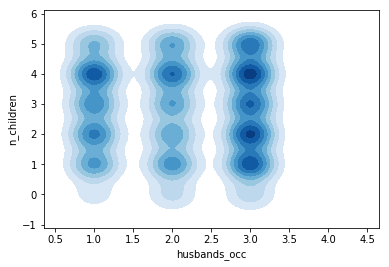

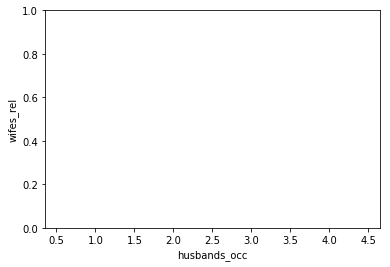

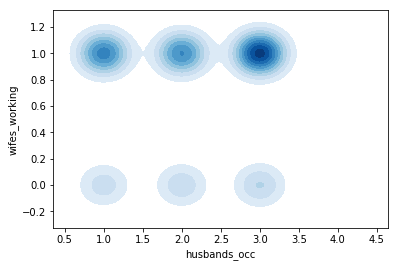

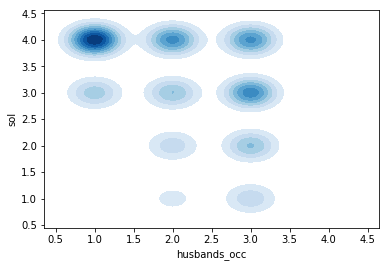

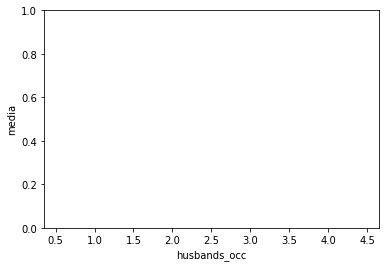

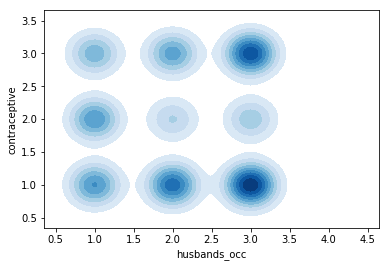

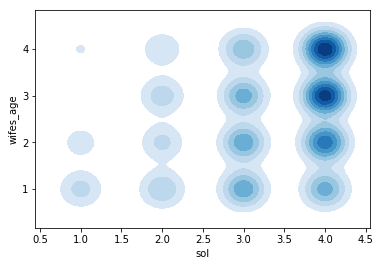

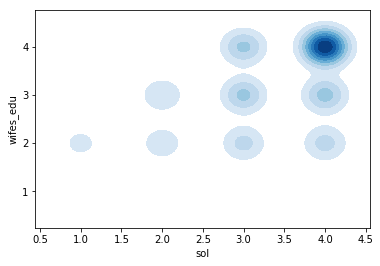

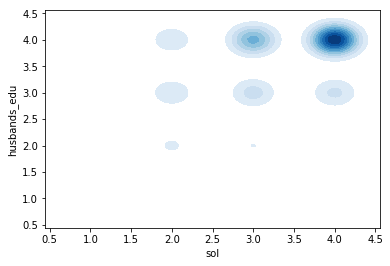

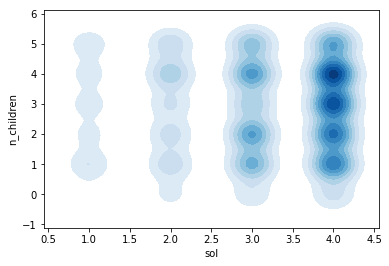

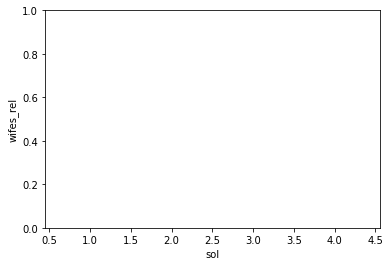

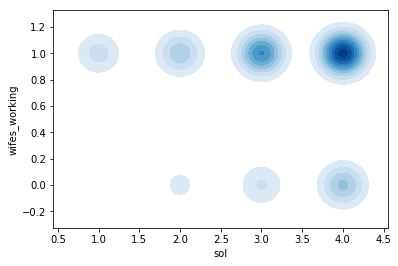

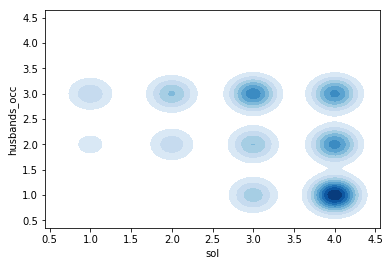

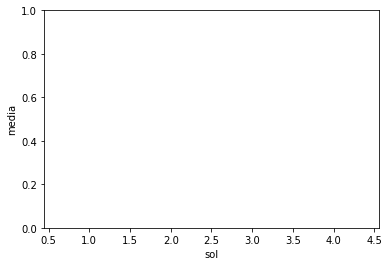

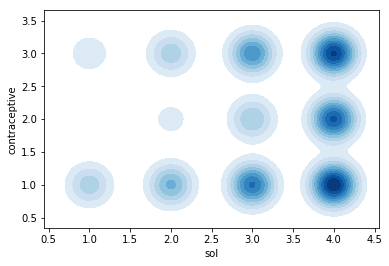

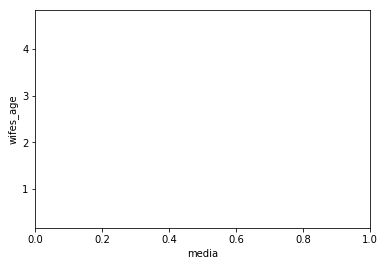

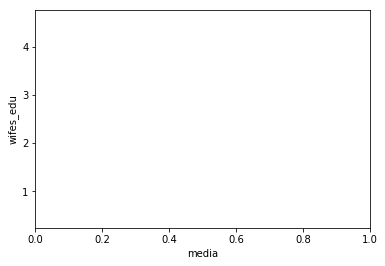

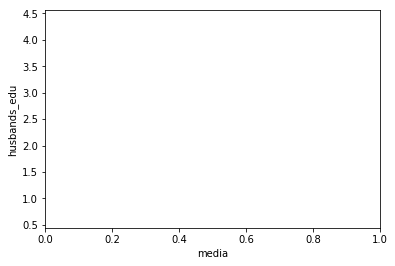

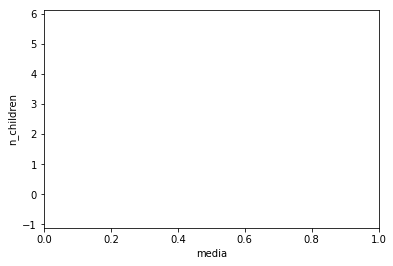

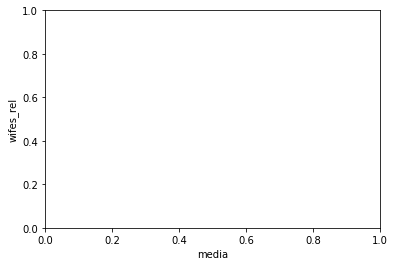

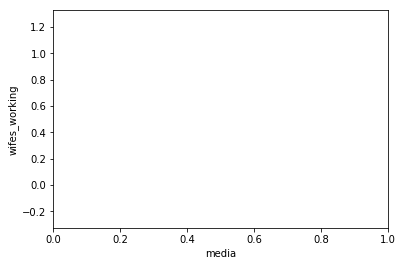

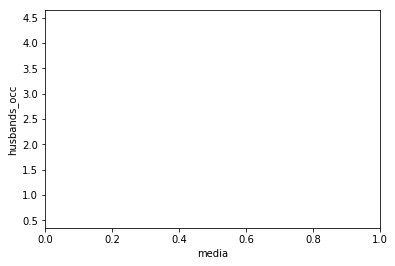

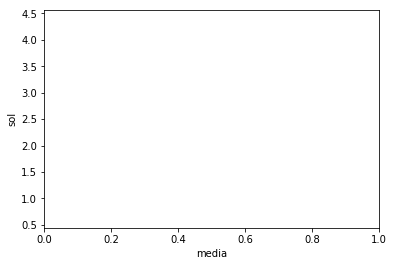

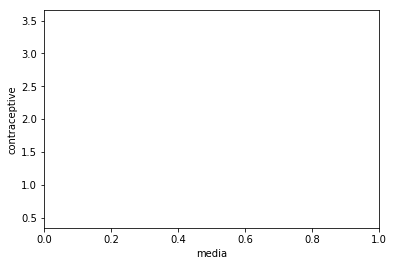

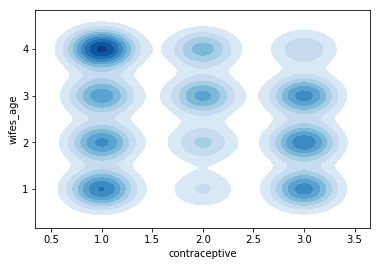

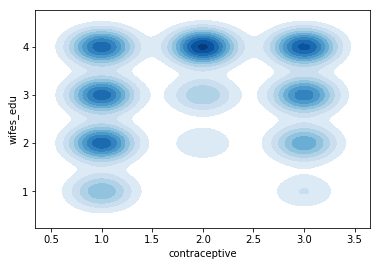

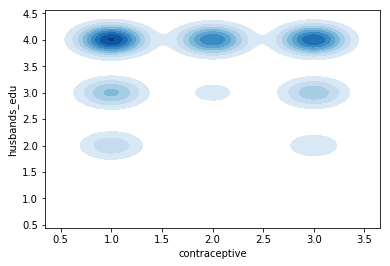

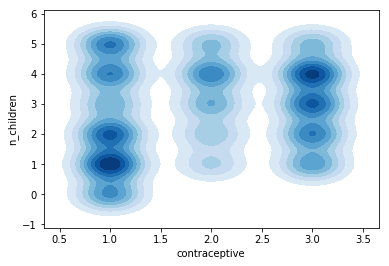

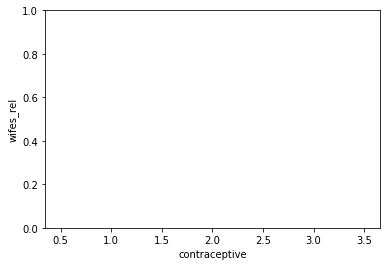

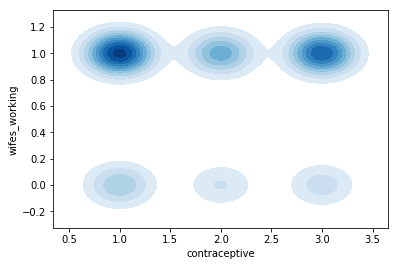

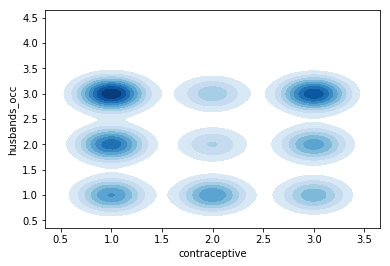

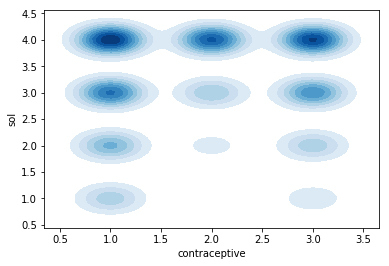

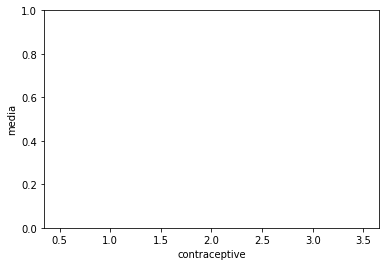

In [19]:
for x, y in column_pairs:
    sns.kdeplot(tr[x], tr[y], cmap='Blues', shade=True, shade_lowest=False)
    plt.show()

# Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [38]:
X, y = tr.drop(['contraceptive'], axis=1), tr['contraceptive']
model = DecisionTreeClassifier(max_depth=3)
model.fit(X, y)

X, y = ts.drop(['contraceptive'], axis=1), ts['contraceptive']
accuracy_score(y, model.predict(X))

0.62

In [31]:
from sklearn.tree import export_graphviz

In [39]:
export_graphviz(model, feature_names=tr.columns[:-1], filled=True, leaves_parallel=True)

# Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB

In [42]:
X, y = tr.drop(['contraceptive'], axis=1), tr['contraceptive']
model = GaussianNB()
model.fit(X, y)

X, y = ts.drop(['contraceptive'], axis=1), ts['contraceptive']
accuracy_score(y, model.predict(X))

0.6